# Data Motivation for RBC

Last update: Oct 27th, 2020

In [1]:
import pandas_datareader.data as web
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Program Files\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
start_date = datetime.datetime(1950, 1, 1)
end_date = datetime.datetime(2020, 9, 1)

In [3]:
# Read some data
GDP = web.DataReader('GDPC1', 'fred', start_date, end_date)
C = web.DataReader('PCECC96', 'fred', start_date, end_date)
I = web.DataReader('GPDIC1', 'fred', start_date, end_date)

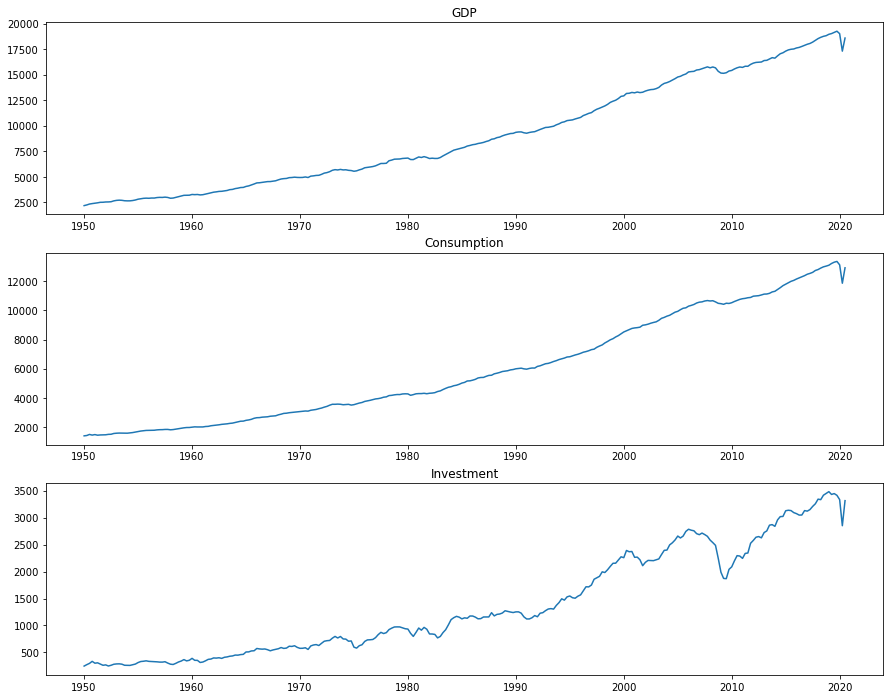

In [4]:
plt.figure(figsize = (15, 12))
plt.subplot(3, 1, 1)
plt.plot(GDP)
plt.title("GDP")
plt.subplot(3, 1, 2)
plt.plot(C)
plt.title("Consumption")
plt.subplot(3, 1, 3)
plt.plot(I)
plt.title("Investment")
plt.show()

In [5]:
GDP_growth = np.log(GDP).diff(1)
C_growth = np.log(C).diff(1)
I_growth = np.log(I).diff(1)

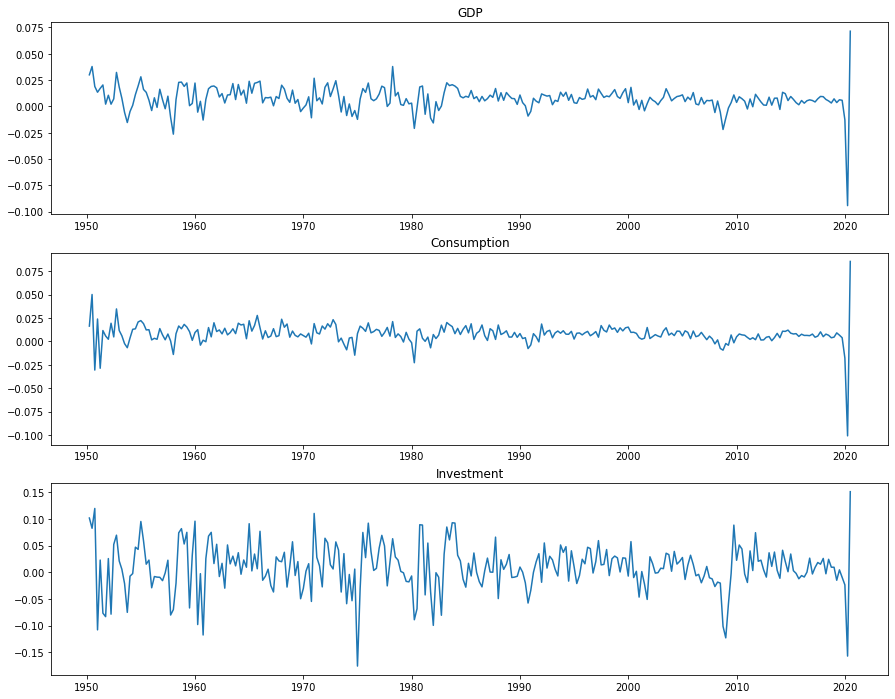

In [6]:
plt.figure(figsize = (15, 12))
plt.subplot(3, 1, 1)
plt.plot(GDP_growth)
plt.title("GDP")
plt.subplot(3, 1, 2)
plt.plot(C_growth)
plt.title("Consumption")
plt.subplot(3, 1, 3)
plt.plot(I_growth)
plt.title("Investment")
plt.show()

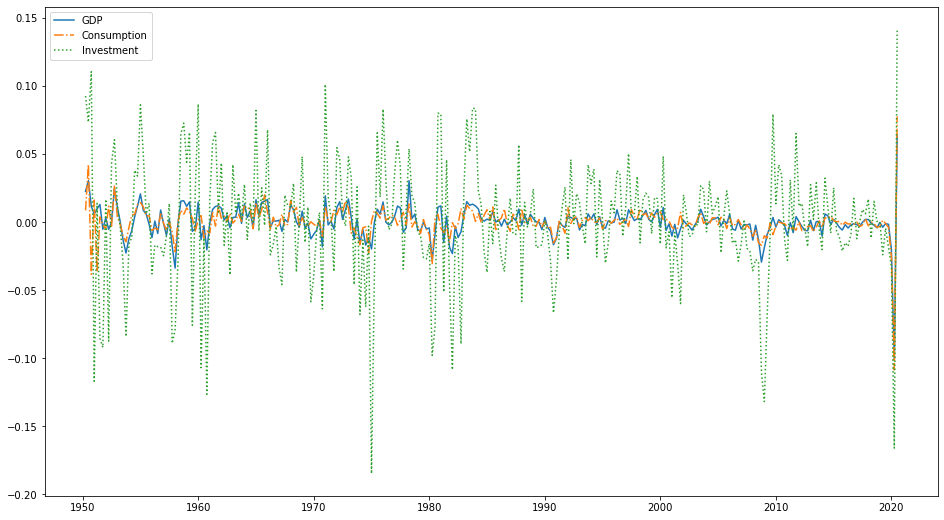

In [7]:
# Compare the demeaned series
plt.figure(figsize = (16, 9))
plt.plot(GDP_growth - GDP_growth.mean(), '-', label = "GDP")
plt.plot(C_growth - C_growth.mean(), '-.', label = "Consumption")
plt.plot(I_growth - I_growth.mean(), ':', label = "Investment")
plt.legend(loc = "best")
plt.show()

## Motivation to Add Labor

In [8]:
L = web.DataReader('UNRATE', 'fred', start_date, end_date)
L = L / 100

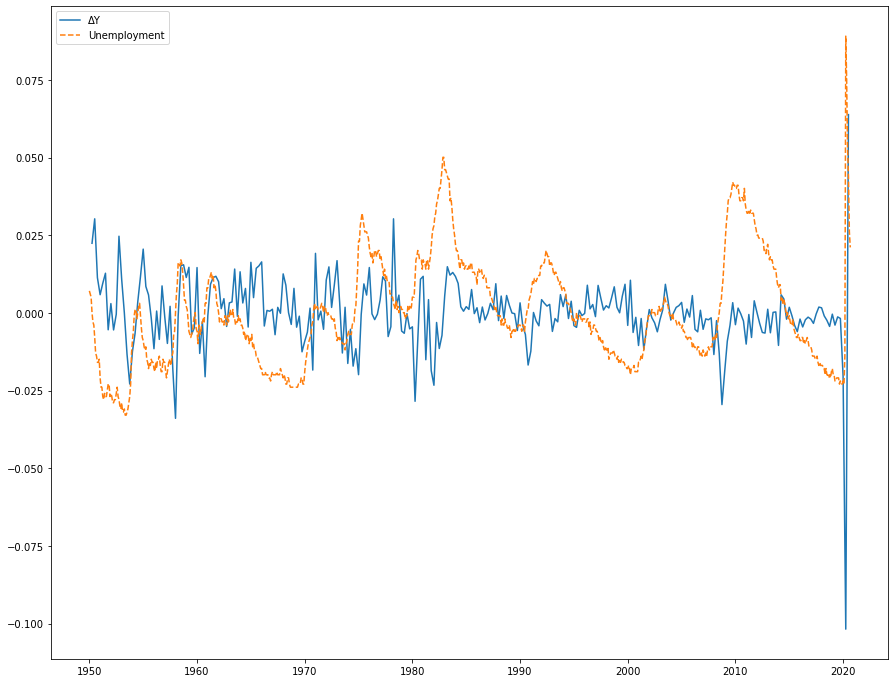

In [9]:
# Compare the demeaned series
plt.figure(figsize = (15, 12))
plt.plot(GDP_growth - GDP_growth.mean(), '-', label = 'ΔY')
plt.plot(L - L.mean(), '--', label = 'Unemployment')
plt.legend(loc = "best")
plt.show()

## Autocorrelation?

In [14]:
GDP_growth["GDPC1"].autocorr()

0.11208121914298125